In [1]:
#Importing the necessarily libraries for data analysis and visualiation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.25)

# Data Exploration

In [2]:
hr_data = pd.read_csv('HR_comma_sep.csv')
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

From here we can gather that we are not missing any data for any of the 11 features in the data set. Now let's explore the data in the charts and gather more information.

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Based on the values above, we a can assumed that satisfacation_level and last_evaluation are on a 0-1 scale due to the range of values. One column that I believe may lead to misintepretation is the sales column. The name itself is not intuitive of the data present in that column. Lets change the column names for better readability.

In [6]:
names = {'satisfaction_level' : 'satisfaction',
         'last_evaluation': 'evaluation',
         'number_project': 'projectCount',
         'average_montly_hours' : 'averageMonthlyHours',
         'time_spend_company' : 'yearsAtCompany',
         'Work_accident' : 'accident',
         'promotion_last_5years': 'promotion',
         'left': 'turnover',
         'sales': 'department'}

hr_data.rename(columns=names, inplace=True)

#Moving the turnover column to the very end
cols = list(hr_data)
cols.insert(9, cols.pop(cols.index('turnover')))
hr_data = hr_data.loc[:, cols]

In [7]:
hr_data.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,accident,promotion,department,salary,turnover
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


Now that the column names are changed for readiblity and easy access, we can begin to explore the data.

In [8]:
turnoverStats = hr_data['turnover'].value_counts() / 14999
turnoverStats

0    0.761917
1    0.238083
Name: turnover, dtype: float64

Approximately 24% of the employees in the dataset have left the company. The question we want to answer is what are the factors that led to the turnover of these employees.

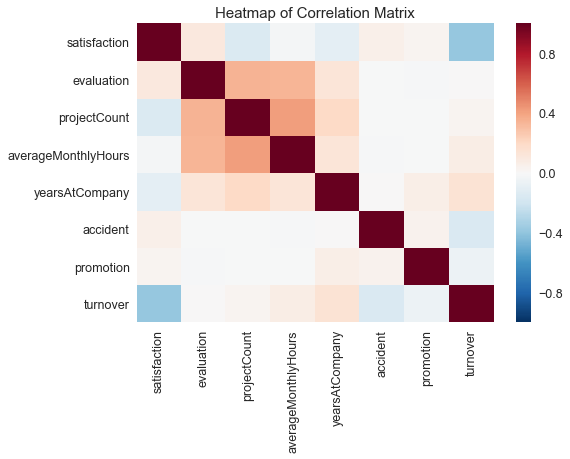

In [9]:
corrmat = hr_data.corr()

sns.heatmap(corrmat)
sns.plt.title('Heatmap of Correlation Matrix')
plt.show()

Plotting a heatmap shows how the features in the dataset are related to each other. As expected, satisfaction and turnover are indirectly proportional to each other. If an employee is satisfied with their job, they are less likely to leave their current positon. We can also see that, those with higher a higher amount of projects, have a higher number of hours and evaluations. Let's investigate the distributions of satisfaction, evaluation, and monthly hours.


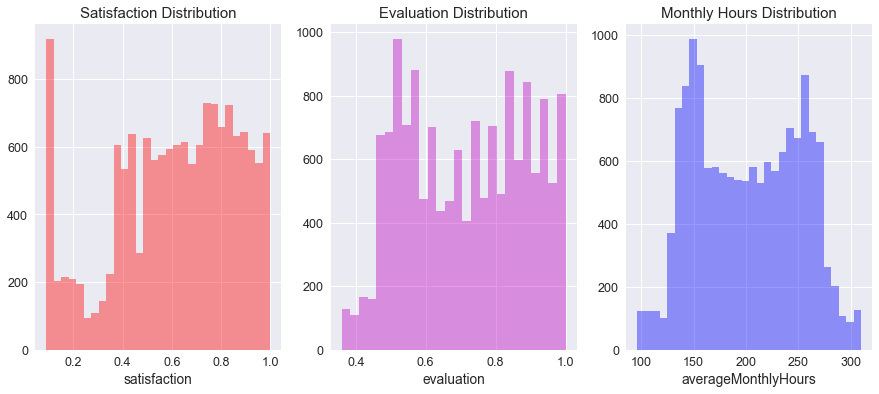

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,6))
sns.distplot(hr_data['satisfaction'], kde=False, color='r', ax=ax1).set_title('Satisfaction Distribution')
sns.distplot(hr_data['evaluation'], kde=False, color='m', ax=ax2).set_title('Evaluation Distribution')
sns.distplot(hr_data['averageMonthlyHours'], kde=False, color='b', ax=ax3).set_title('Monthly Hours Distribution')
plt.show()

A large amount of employees are very unsatisfied with their current position as well as there are two spikes in evaluations. We know for a fact that unsatisfied employees leave. One question to explore is what influences an employees satisfaction in this company. First, lets take a look at how satisfaction varies per years at the company.

# Satisfaction vs Years

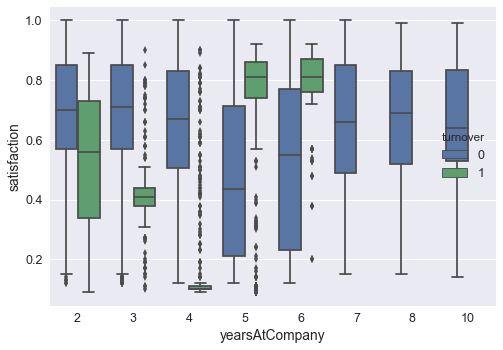

In [11]:
sns.boxplot(x='yearsAtCompany', y='satisfaction', hue='turnover', data=hr_data)
plt.show()

For the first 2-3 years satisfaction remains relatively constant throughout the years for employees who did not leave, however it varies across those who turnover. What is distinctive is that, those employees who have been with the company 5-6 years and are satisfied with their position are leaving, and no employee who has been with the company longer than 7 years has left.

# Project Count vs Monthly hours and Evaluation

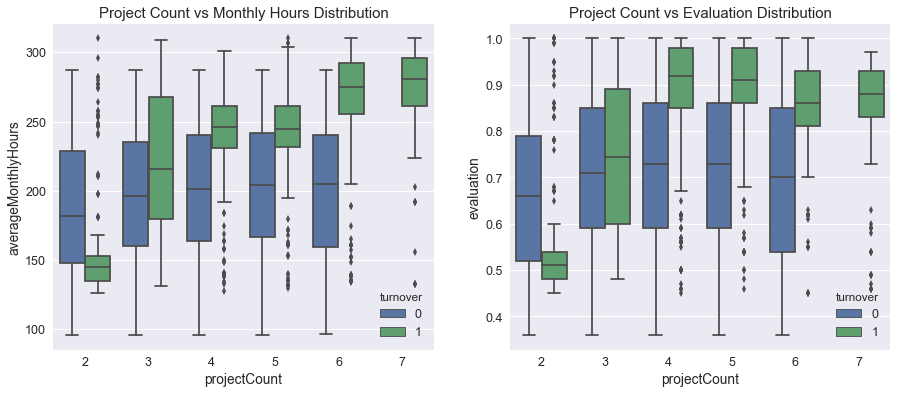

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
sns.boxplot(x='projectCount', y='averageMonthlyHours', hue='turnover', data=hr_data, ax=ax1).set_title(
    'Project Count vs Monthly Hours Distribution')
sns.boxplot(x='projectCount', y='evaluation', hue='turnover', data=hr_data, ax=ax2).set_title(
    'Project Count vs Evaluation Distribution')
plt.show()

What strikes me as interesting is that those employees who stayed their average monthly hours and evalutions stayed approximately the same as their number of projects increased. This is unlike those who left where all three features increased with each other. We can conclude that the good employees are leaving, as those with the highest evalutions and projects are leaving. These are the employees the company should strive to persuade to stay. 

# Density Distribution of Monthly Hours

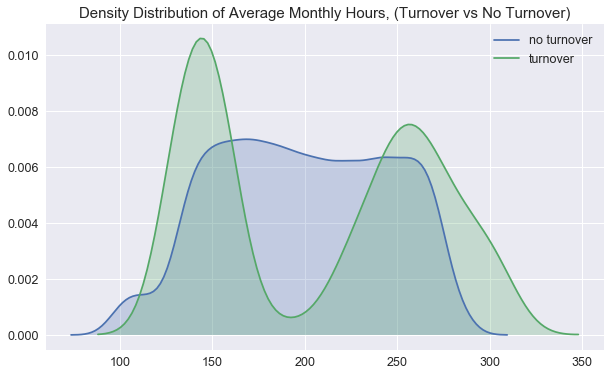

In [13]:
fig = plt.figure(figsize=(10,6))
ax = sns.kdeplot(hr_data.loc[(hr_data['turnover'] == 0), 'averageMonthlyHours'], shade=True, label= 'no turnover')
ax = sns.kdeplot(hr_data.loc[(hr_data['turnover'] == 1), 'averageMonthlyHours'], shade=True, label= 'turnover')
plt.title('Density Distribution of Average Monthly Hours, (Turnover vs No Turnover)')
plt.show()

Assuming that each person works 40 hours per week, and there are 4 weeks in a month. The average monthly hours should be in the range of 160hrs/month. The distribution of those the hours of the employees who did not turnover, were fairly constant throughout. However we can notice that there are two peaks of those who did turnover. This could suggest that some employees are being overworked, and some are not working much at all.

# Evaluation vs Satisfaction

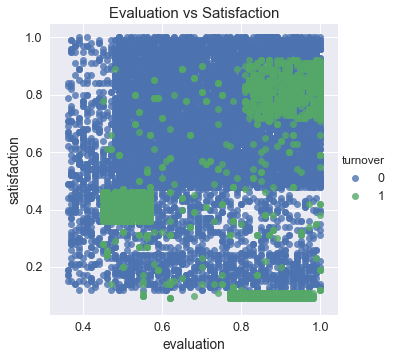

In [14]:
sns.lmplot(x='evaluation', y='satisfaction', data=hr_data, hue='turnover', fit_reg=False)
plt.title('Evaluation vs Satisfaction')
plt.show()


Three clusters seem to be forming from the employees who left in this plot.
Cluster 1) Evaluation of approximately 0.42-0.55 and Satisfaction of approximately 0.38-0.48
           These are the employees that are bad and sad at their company. Could these employees of left because they felt underworked or felt as if the evaluation negatively impacked their work performance?
Cluster 2) Evaluation of approximately 0.75-0.98 and Satisfaction of approximatley 0-0.1
           These are the employees who are excel with their job, but are sad. What is the causation of this unsatisfaction? Are they overworked? Are the hours too long for them?
Cluster 3) Evaluation of approximately 0.8-1.0 and Satisfaction of approximately 0.7-.9
           This are the employees who are great at their job and happy. This and cluster 2 are the employees the compnay should aim to keep. The question is why did this cluster leave? Could it be the that these employees found a different place to work? For more money possibly?
It is evidential that we have the three clusters, let's utilize a clustering algorithm to classify the outliers that are clearly not part of a cluster just by visualization.


# KMeans Clustering

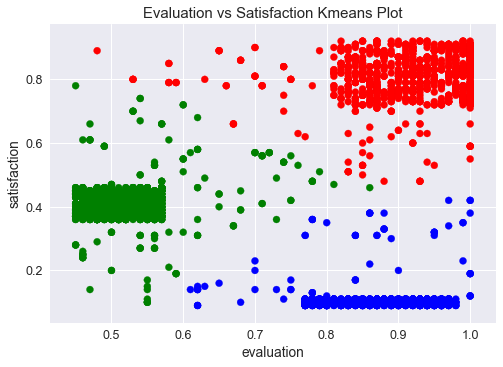

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(hr_data[hr_data.turnover==1][["satisfaction","evaluation"]])

colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]
plt.scatter(x='evaluation', y='satisfaction', data=hr_data[hr_data['turnover'] == 1], color = colors)
plt.xlabel('evaluation')
plt.ylabel('satisfaction')
plt.title('Evaluation vs Satisfaction Kmeans Plot')
plt.show()


# Summary

In short, we can now understand which groups of employees are leaving the company. Suggestions we can give to the company would be to distribute the work evenly to avoid overworking or underworking their employees, and to give fair evaluations to everyone and not solely those who are working on multiple projects.